# 200_YouTube_Analysis


## Purpose

In this notebook we will analise the data we have gathered. We will explore what kind of correlations we can find between the Harmonic mean and the various measures we have for our trailers, i.e. Views, Likes, etc..

## Datasets

 - Input: movieTrailers.pkl
 - Output: n/a

In [2]:
import json#for decoding a JSON response
import pandas as pd
import seaborn as sns
import jellyfish
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
movieTrailers = pd.read_pickle('../../data/analysis/movieTrailers.pkl')

In [4]:
movieTrailers.shape

(1406, 14)

In [5]:
movieTrailers.head()

,genre,gross,score,votes,year,scoreRank,grossRank,HarMean,Title,Published,Views,Likes,Dislikes,Comments
0,Comedy,13101142.0,5.7,25725,2012,1552.0,3505.0,0.315389,Playing for Keeps,2012,1827077,2170,196,425
1,Action,58607007.0,6.2,193792,2014,2716.5,5658.0,0.538321,RoboCop,2013,455579,2887,119,297
2,Action,58607007.0,6.2,193792,2014,2716.5,5658.0,0.538321,RoboCop,2013,3594723,16329,1575,4803
3,Action,58607007.0,6.2,193792,2014,2716.5,5658.0,0.538321,RoboCop,2013,41334,397,52,65
4,Action,58607007.0,6.2,193792,2014,2716.5,5658.0,0.538321,RoboCop,2013,41334,397,52,65


# Comparing interactions

Here we were examining what sort of correlation that could be found when we compared the harmonic mean to our various methods of gauging trailer success.

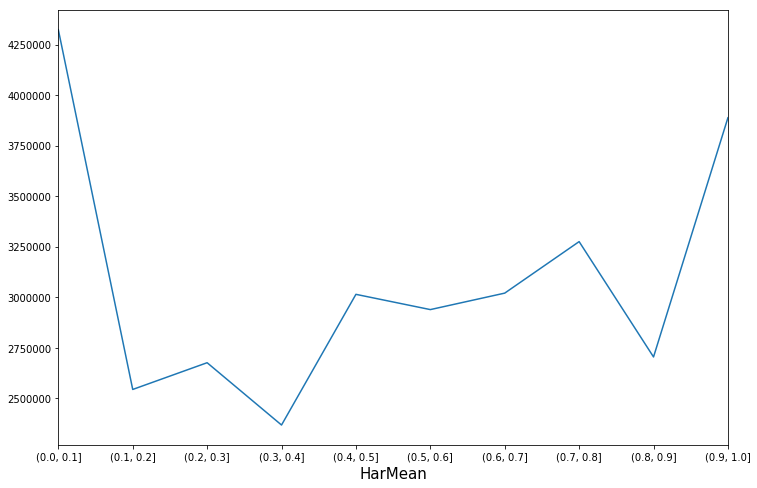

In [6]:
bins = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
df = movieTrailers.groupby(pd.cut(movieTrailers['HarMean'], bins=bins))['Views'].mean()
plt.xlabel('Year',size=15)
plt.ylabel('',size=15)
plt.xlabel('Binned Scores',size=15)
df.plot(figsize=(12,8))

When we consider views to against our harmonic mean we do see an interesting trend. The Movies at each end of the spectrum gained a huge amount of views. The correlation of this method of comparison however was very poor as you can see below neither method gives a correlation much greater than the zero correlation, in fact with the spearman correlation we see its actually a negative correlation.

In [7]:
movieTrailers['HarMean'].corr(movieTrailers['Views'],'pearson') 

0.023218034608901088

In [8]:
movieTrailers['HarMean'].corr(movieTrailers['Views'],'spearman') 

-0.005572031828108442

We then examined likes compared to the harmonic mean.

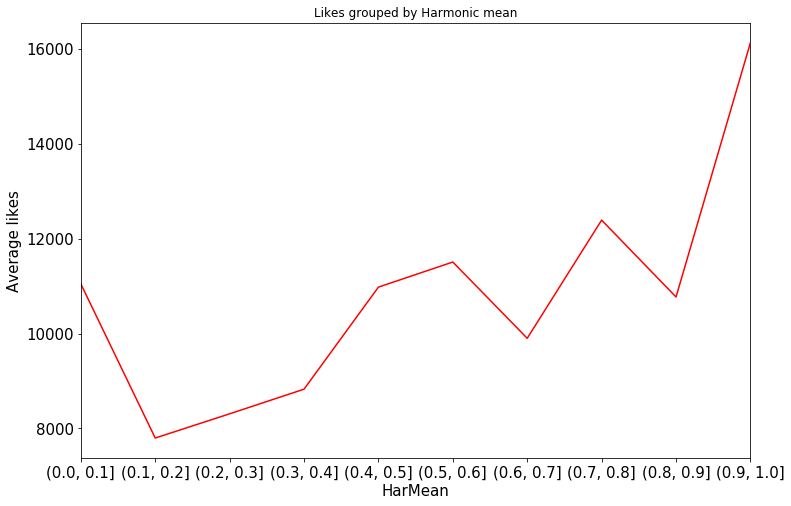

In [9]:
bins = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
df = movieTrailers.groupby(pd.cut(movieTrailers['HarMean'], bins=bins))['Likes'].mean()
plt.legend(prop={'size': 15})
plt.ylabel('Average likes',size=15)
plt.xlabel('Harmonic mean',size=15)
df.plot(figsize=(12,8),title='Likes grouped by Harmonic mean',fontsize=15,color='red')

When we consider the visualisation here we do see that it trends upwards with the movies with the best harmonic mean getting the greatest number of likes. while this seems to be quite promising we must consider that this is the average number and so when we analyse the correlation we see another very poor correlation.

In [10]:
movieTrailers['HarMean'].corr(movieTrailers['Likes'],'pearson')

0.08592940232147865

In [11]:
movieTrailers['HarMean'].corr(movieTrailers['Likes'],'spearman')

0.05056872217255898

The next measure we examine was that of the dislikes a video received.

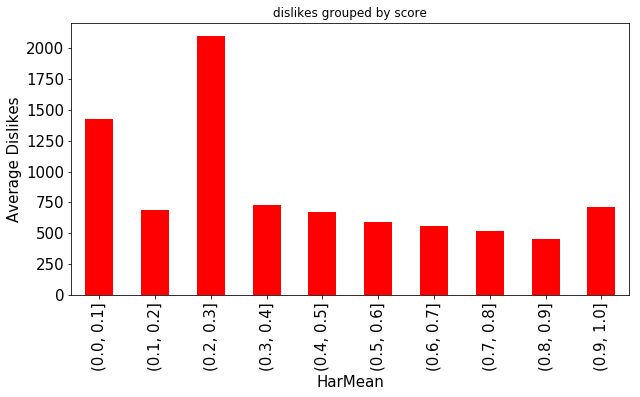

In [12]:
bins = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
df = movieTrailers.groupby(pd.cut(movieTrailers['HarMean'], bins=bins))['Dislikes'].mean()
plt.legend(prop={'size': 15})
plt.ylabel('Average Dislikes',size=15)
plt.xlabel('Harmonic mean',size=15)
df.plot.bar(figsize=(10,5),title='dislikes grouped by score',fontsize=15,color='red')

This again does seem to follow somewhat of a trend however we can see spikes in the graph at seemingly random harmonic mean values. While the correlation here is negative when we consider the data we have here that correlation is actually positive, as the more dislikes the worse the trailer, or so you would expect. But even despite this the correlation is very weak.

In [13]:
movieTrailers['HarMean'].corr(movieTrailers['Dislikes'],'pearson')

-0.08541142206398293

In [14]:
movieTrailers['HarMean'].corr(movieTrailers['Dislikes'],'spearman')

-0.12505365159206816

The final measure we had of just our single measure was the comments for the videos 

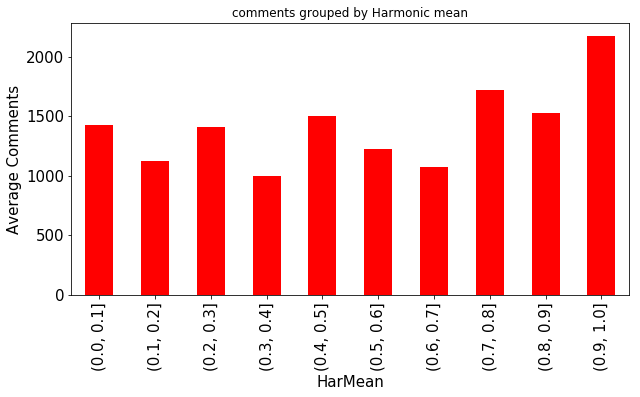

In [15]:
bins = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
df = movieTrailers.groupby(pd.cut(movieTrailers['HarMean'], bins=bins))['Comments'].mean()
plt.legend(prop={'size': 15})
plt.ylabel('Average Comments',size=15)
plt.xlabel('Harmonic mean',size=15)
df.plot.bar(figsize=(10,5),title='comments grouped by Harmonic mean',fontsize=15,color='red')

We see another weak correlation here which seems to make sense when you consider the graph. The correlation is clearly not linear as every second bar is dropping lower than the one before it. While the correlation can be somewhat seen though as we can see that the trailers for movies with the best harmonic mean did get the most amount of comments.

In [16]:
movieTrailers['HarMean'].corr(movieTrailers['Comments'],'pearson')

0.06883249693567288

In [17]:
movieTrailers['HarMean'].corr(movieTrailers['Comments'],'spearman')

0.05814495719937954

# Ratio comparisons

While considering just a single measure of interaction does not show much correlation we considered then the effect that creating ratios would have on the data. We created these to give a better representation of how well a video was interacted with.

In [18]:
movieTrailers['likes/dislikes'] = (movieTrailers.Likes/movieTrailers.Dislikes)
movieTrailers['views/likes'] = (movieTrailers.Views/movieTrailers.Likes)
movieTrailers['views/dislikes'] = (movieTrailers.Views/movieTrailers.Dislikes)
movieTrailers['views/comments'] = (movieTrailers.Views/movieTrailers.Comments)

Another vital reason why using ratios can improve the correlation between movie and trailer success is that it removes the effect that the channel growth has on the data. AS the YouTube channel we used to gather our information from, movieclipstrailers, began in 2011 it makes sense that the likes and views etc. grow as the channel grows.

We can see the effect this has on the trailers as the trailers from 2011 receive much fewer likes than the average trailers from 2016.


Text(0.5,0,'Year')

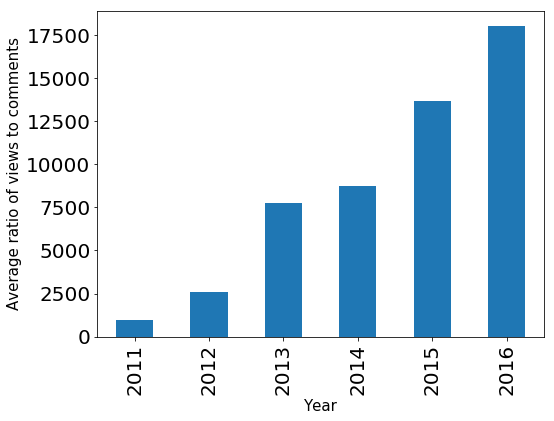

In [19]:
movieTrailers.groupby('year')['Likes'].mean().plot.bar(fontsize=20,use_index=True,figsize=(8,6))
plt.ylabel('Average ratio of views to comments',size=15)
#plt.title()
plt.xlabel('Year',size=15)

Now when we use our ratio to see how the average like/dislike ratio stay much more stable throughout the years. This will give us a much fairer reading of our trailers as it mitigates the effect that channel growth has on the trailers.

Text(0.5,0,'Year')

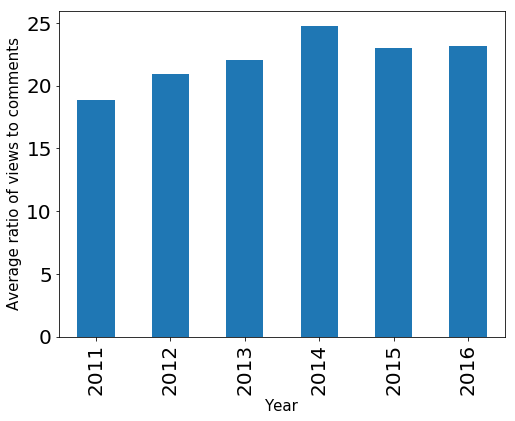

In [20]:
movieTrailers.groupby('year')['likes/dislikes'].mean().plot.bar(fontsize=20,use_index=True,figsize=(8,6))
plt.ylabel('Average ratio of views to comments',size=15)
#plt.title()
plt.xlabel('Year',size=15)

The ratios we created above all measure a different aspect of interaction with a movies trailers. We created 4 distinct ratios which were, likes/dislikes, views/likes, views/dislikes and views/comments.

The first ratio we considered was the number of likes a video received compared to the number of likes.

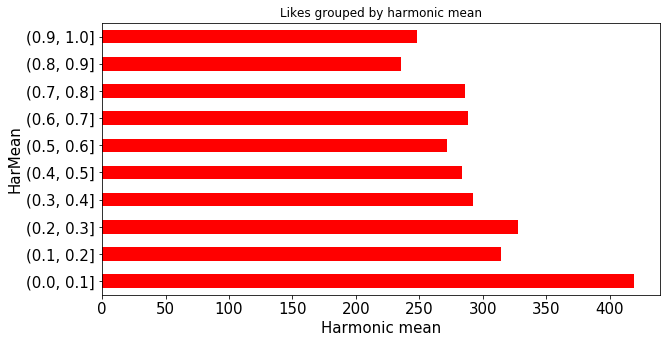

In [21]:
bins = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
df = movieTrailers.groupby(pd.cut(movieTrailers['HarMean'], bins=bins))['views/likes'].mean()
plt.legend(prop={'size': 15})
plt.ylabel('Average views/likes',size=15)
plt.xlabel('Harmonic mean',size=15)
df.plot.barh(figsize=(10,5),title='Likes grouped by harmonic mean',fontsize=15,color='red')

For this ratio a huge number such as 400 for the bottom end of the harmonic mean show us that on average it takes more views to garner likes for those trailers than it does for the movies trailers sitting at the top of the harmonic mean. We can see that while the correlation is still weak it is considerably better than the correlations of all the single measures such as likes, dislikes, comments and views.

In [22]:
movieTrailers['HarMean'].corr(movieTrailers['views/likes'],'pearson')

-0.19811694438777283

In [23]:
movieTrailers['HarMean'].corr(movieTrailers['views/likes'],'spearman')

-0.15001590169319773

The next ratio to be considered was that of the like/dislikes.

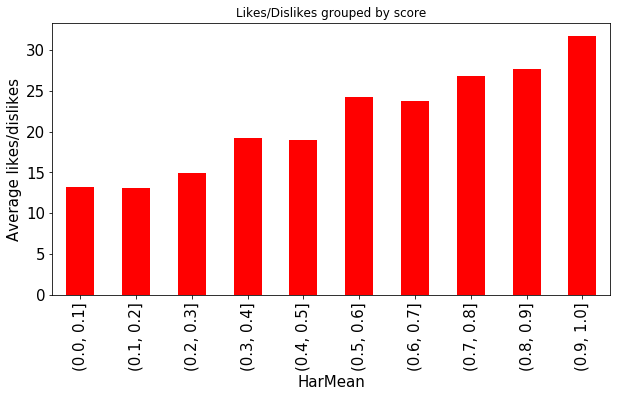

In [24]:
bins = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
df = movieTrailers.groupby(pd.cut(movieTrailers['HarMean'], bins=bins))['likes/dislikes'].mean()
plt.legend(prop={'size': 15})
plt.ylabel('Average likes/dislikes',size=15)
plt.xlabel('Harmonic mean',size=15)
df.plot.bar(figsize=(10,5),title='Likes/Dislikes grouped by score',fontsize=15,color='red')

This provided us with our best correlation yet. By examining the graph we can see the it trends nicely upwards with almost every bar rising in sequence. With the spearman correlation we can see a correlation of almost 0.4 which is still slightly weak it is still a considerable correlation compared to the others.

In [25]:
movieTrailers['HarMean'].corr(movieTrailers['likes/dislikes'],'pearson')

0.3651497098828634

In [26]:
movieTrailers['HarMean'].corr(movieTrailers['likes/dislikes'],'spearman')

0.3986338532889026

then we examined the views to dislikes correlation.

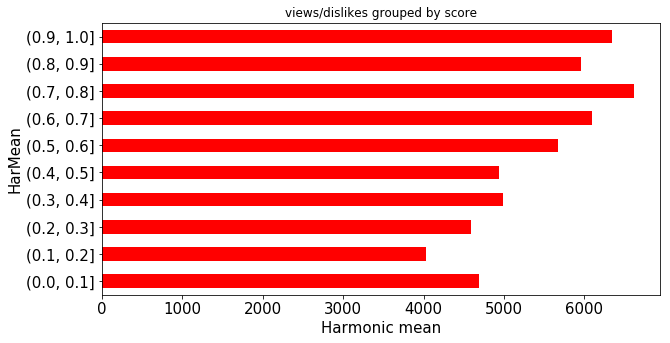

In [27]:
bins = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
df = movieTrailers.groupby(pd.cut(movieTrailers['HarMean'], bins=bins))['views/dislikes'].mean()
plt.legend(prop={'size': 15})
plt.ylabel('Average views/dislikes',size=15)
plt.xlabel('Harmonic mean',size=15)
df.plot.barh(figsize=(10,5),title='views/dislikes grouped by score',fontsize=15,color='red')

We can see another correlation here that surpasses are initial measures of trailer success. The tend on the graph is visible and we can see that the correlation while not strong, is enough to be noticeable.

In [28]:
movieTrailers['HarMean'].corr(movieTrailers['views/dislikes'],'pearson')

0.2049333162608652

In [29]:
movieTrailers['HarMean'].corr(movieTrailers['views/dislikes'],'spearman')

0.22724619244840583

Our final correlation analysis was that of our views to comments.

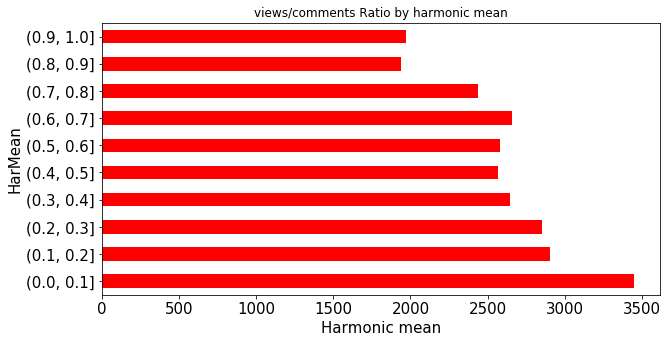

In [30]:
bins = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
df = movieTrailers.groupby(pd.cut(movieTrailers['HarMean'], bins=bins))['views/comments'].mean()
plt.legend(prop={'size': 15})
plt.ylabel('Number Likes to views/comments',size=15)
plt.xlabel('Harmonic mean',size=15)
df.plot.barh(figsize=(10,5),title='views/comments Ratio by harmonic mean',fontsize=15,color='red')

When examining the graph, we do notice the trend of the number of views needed for a comment increases as the harmonic mean value decreases. The correlation again though is on the weak side which tells us that while the trend is strong enough to visualise it does not mean that the correlation is sufficient to accurately measure the success of a trailer to that of the movie it represents.

In [31]:
movieTrailers['HarMean'].corr(movieTrailers['views/comments'],'pearson')

-0.16062147692583392

In [32]:
movieTrailers['HarMean'].corr(movieTrailers['views/comments'],'spearman')

-0.15300341226164524

In [34]:
movieTrailers.to_pickle('../../data/final/movieTrailers.pkl')